In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_k_sphere(n_points):
    # Get an array of n_points on a sphere of radius 1
    # shape (n_points)
    indecies=np.arange(0,n_points)
    phis = np.arccos(1 - 2*indecies / n_points)
    thetas = np.pi*(1+5**0.5) * indecies
    xs=np.sin(phis) * np.cos(thetas)
    ys=np.sin(phis) * np.sin(thetas)
    zs = np.cos(phis)
    
    sphere_points=np.vstack((xs,ys,zs)).T 
    return sphere_points
    # axis_points = np.array([
    #     [1, 0, 0], [-1, 0, 0],
    #     [0, 1, 0], [0, -1, 0],
    #     [0, 0, 1], [0, 0, -1]
    # ])

    # return np.vstack((sphere_points, axis_points))

def make_symmetry_operation(rotation=np.eye(3),translation=np.zeros(3),time_reversal=False):
    rotation_tr=rotation
    if time_reversal:
        rotation_tr=-1*rotation
    def sym_op(p):
        return rotation_tr @ p
    return sym_op

def (a,b,tol=1e-3):
    return np.linalg.norm(a-b)<tol
    
def score_invariantness_points(k_points,symmetry_operations,tol=1e-6):
    distances_from_invariant=[]

    for k_point in k_points:
        invariant=False
        for symmetry_operation in symmetry_operations.values():
            k_point_symmetry=symmetry_operation(k_point)

        distances_from_invariant.append(k_point)
    return np.array(distances_from_invariant)

Text(0.5, 0, 'x')

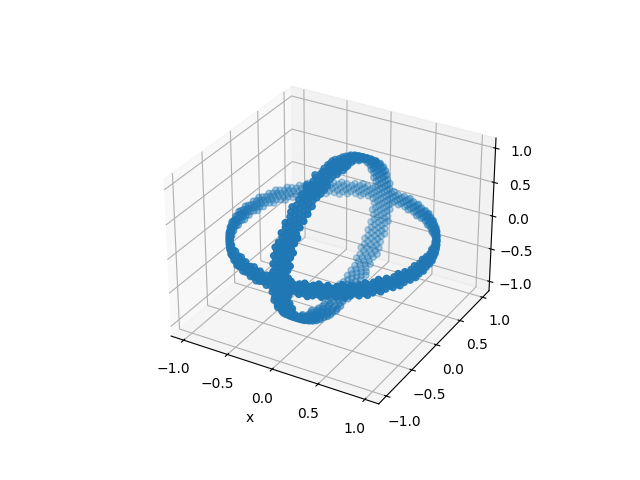

In [42]:
%matplotlib widget
points=get_k_sphere(5000)

# All antiunitary operations in Pbnm with G-type AF
symmetry_operations_antiunitary={}
symmetry_operations_antiunitary['03_ScrewX']=make_symmetry_operation(np.array([[1,0,0],[0,-1,0],[0,0,-1]]),np.array([1/2,1/2,0]),time_reversal=True)
symmetry_operations_antiunitary['04_MirrorXTransXY']=make_symmetry_operation(np.array([[-1,0,0],[0,1,0],[0,0,1]]),np.array([1/2,1/2,0]),time_reversal=True)
symmetry_operations_antiunitary['05_ScrewZ']=make_symmetry_operation(np.array([[-1,0,0],[0,-1,0],[0,0,1]]),np.array([0,0,1/2]),time_reversal=True)
symmetry_operations_antiunitary['06_MirrorZTransZ']=make_symmetry_operation(np.array([[1,0,0],[0,1,0],[0,0,-1]]),np.array([0,0,1/2]),time_reversal=True)

remainting_k, invariant_k = filter_invariant_points(points,symmetry_operations_antiunitary,tol=2e-1)


fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(invariant_k[:,0],invariant_k[:,1],invariant_k[:,2])
ax.set_xlabel('x')